*week 2 exercise - part 1*

# Basic Charts with Matplotlib

## Matplotlib

First, we import the required libraries, using standard conventions. We first import numpy for all our mathematical needs, then the matplotlib as plotting library and pyplot which gives an easy API to create plots with matplotlib. Later we will introduce Seaborn as well.

In [12]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

# we need the following line to indicate that the plots should be shown inline with the Jupyter notebook.
%matplotlib inline 

We will first create a simple plot of a mathematical function. We first create a numpy array of x-values. Then for each x-value we create the y-value, i.e. the function value. Plotting this function is as easy as giving it the x and y values.

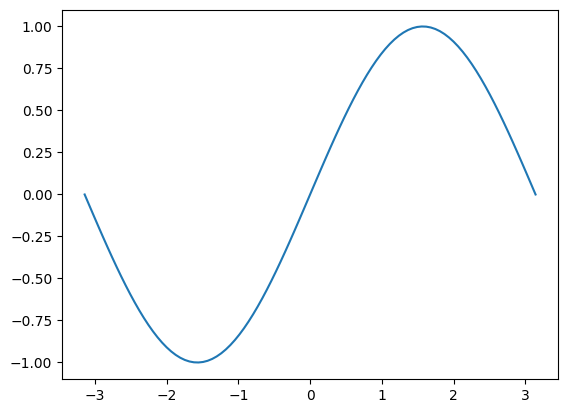

In [13]:
X = np.linspace(-np.pi, np.pi, 100) # define a NumPy array with 100 points in the range -Pi to Pi
Y = np.sin(X)  # define the curve Y by the sine of X

plt.plot(X,Y); # use matplotlib to plot the function

While creating such plots is perfectly fine when you are exploring data, in your final notebook the plot is hard to understand for the reader. With matplotlib it is very easy to add labels, a title and a legend. You can also change the limits of the plot, the style of the lines and much more.

The following could be seen as the bare minimum for a plot to be understood as part of reproducible research.

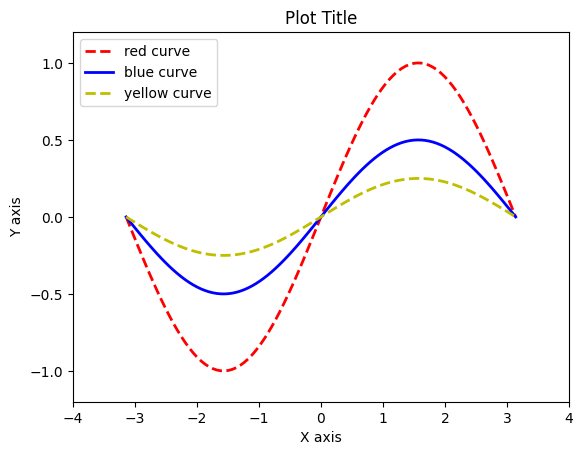

In [14]:
plt.plot(X, Y, 'r--', linewidth=2)
plt.plot(X, Y/2, 'b-', linewidth=2)
plt.plot(X, Y/4, 'y--', linewidth=2)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Plot Title')
plt.xlim(-4, 4)
plt.ylim(-1.2, 1.2)
plt.legend(['red curve', 'blue curve', 'yellow curve'], loc='best')

Go to the documentation pages of Matplotlib [http://matplotlib.org/contents.html](http://matplotlib.org/contents.html) to find all the possible options for a plot and also to see more tutorials, videos and book chapters to help you along the way.

Another nice tutorials:
* [http://www.labri.fr/perso/nrougier/teaching/matplotlib/](http://www.labri.fr/perso/nrougier/teaching/matplotlib/)

This assignment first shows you how to download csv data from an online source. Then we're exploring a dataset of all the cities in the world and compare cities in The Netherlands to the rest of the world.

## Loading data CSV and Pandas
We will work with a database of information about cities around the world:

[https://dev.maxmind.com/geoip/geoip2/geolite2/](https://dev.maxmind.com/geoip/geoip2/geolite2/)

Working with data structures can be done in many ways in Python. There are the standard Python arrays, lists and tuples. You can also use the arrays in the numpy package which allow you to do heavy math operations efficiently. For data analysis Pandas is often used, because data can be put into so-called dataframes. Dataframes store data with column and row names and can easily be manipulated and plotted. You will learn more about Pandas in the Machine Learning workshops. A short intro can be found here:

https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

In [15]:
import urllib.request as urllib, zipfile, os

url = 'https://github.com/CODAIT/redrock/raw/master/twitter-decahose/src/main/resources/Location/'
filename = 'worldcitiespop.txt.gz'
datafolder = 'data/'

In [16]:
downloaded = urllib.urlopen(url + filename)
buf = downloaded.read()

try:
    os.mkdir(datafolder)
except FileExistsError:
    pass

with open(datafolder + filename, 'wb') as f:
    f.write(buf)

In [17]:
import pandas as pd
# reading files may cause problems or give errors... Can you explain the use of the encoding parameter?
cities = pd.read_csv(datafolder + filename, sep=',', low_memory=False, encoding = 'ISO-8859-1')

cities

Country         City   AccentCity Region  Population   Latitude  \
0            ad        aixas        Aixàs     06         NaN  42.483333   
1            ad   aixirivali   Aixirivali     06         NaN  42.466667   
2            ad   aixirivall   Aixirivall     06         NaN  42.466667   
3            ad    aixirvall    Aixirvall     06         NaN  42.466667   
4            ad     aixovall     Aixovall     06         NaN  42.466667   
...         ...          ...          ...    ...         ...        ...   
3173953      zw   zimre park   Zimre Park     04         NaN -17.866111   
3173954      zw  ziyakamanas  Ziyakamanas     00         NaN -18.216667   
3173955      zw   zizalisari   Zizalisari     04         NaN -17.758889   
3173956      zw      zuzumba      Zuzumba     06         NaN -20.033333   
3173957      zw   zvishavane   Zvishavane     07     79876.0 -20.333333   

         Longitude  
0         1.466667  
1         1.500000  
2         1.500000  
3         1.500000  
4         1.483333  
...            ...  
3173953  31.213611  
3173954  27.950000  
3173955  31.010556  
3173956  27.933333  
3173957  30.033333  

[3173958 rows x 7 columns]

## Data Manipulation

We can take a peek at the data by checking out the final rows of data. Do you see any potential problem with this dataset?

In [18]:
cities.tail()

Country         City   AccentCity Region  Population   Latitude  \
3173953      zw   zimre park   Zimre Park     04         NaN -17.866111   
3173954      zw  ziyakamanas  Ziyakamanas     00         NaN -18.216667   
3173955      zw   zizalisari   Zizalisari     04         NaN -17.758889   
3173956      zw      zuzumba      Zuzumba     06         NaN -20.033333   
3173957      zw   zvishavane   Zvishavane     07     79876.0 -20.333333   

         Longitude  
3173953  31.213611  
3173954  27.950000  
3173955  31.010556  
3173956  27.933333  
3173957  30.033333

In [19]:
cities.dropna().sort_values(by='Population', ascending=False).tail(10)

Country         City   AccentCity Region  Population   Latitude  \
2557766      ru   vstrechnyy   Vstrechnyy     15        12.0  67.950000   
1028143      gl     ivittuut     Ivittuut     03        11.0  61.200000   
916064       fo   skaelingur    Skælingur     00        11.0  62.100000   
1723733      lu      crendal      Crendal     01        10.0  50.057778   
2055798      pa  el porvenir  El Porvenir     09        10.0   9.565278   
1724366      lu      schleif      Schleif     01         8.0  49.990556   
1028486      gl    timerliit    Timerliit     03         7.0  65.833333   
1028303      gl     neriunaq     Neriunaq     03         7.0  64.466667   
1028477      gl     tasiusaq     Tasiusaq     03         7.0  73.366667   
2360929      ru   aliskerovo   Aliskerovo     15         7.0  67.766667   

          Longitude  
2557766  165.600000  
1028143  -48.166667  
916064    -7.000000  
1723733    5.898056  
2055798  -78.953333  
1724366    5.857500  
1028486  -53.250000  
1028303  -50.316667  
1028477  -56.050000  
2360929  167.583333

By sorting the cities on population we immediately see the entries of a few of the largest cities in the world.

## Assignment 1a
To get an idea of where in the world the cities in the dataset are located, we want to make a scatter plot of the position of all the cities in the dataset.

Don't worry about drawing country borders, just plot the locations of the cities.

Remember to use all the basic plot elements you need to understand this plot.

I have used np.log to make it a liniar flow of population for the visualisation

C:\Users\super\AppData\Local\Temp\ipykernel_27712\3779910952.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cities_Log.Population = np.log(cities_Log.Population)
C:\Users\super\AppData\Local\Temp\ipykernel_27712\3779910952.py:15: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))


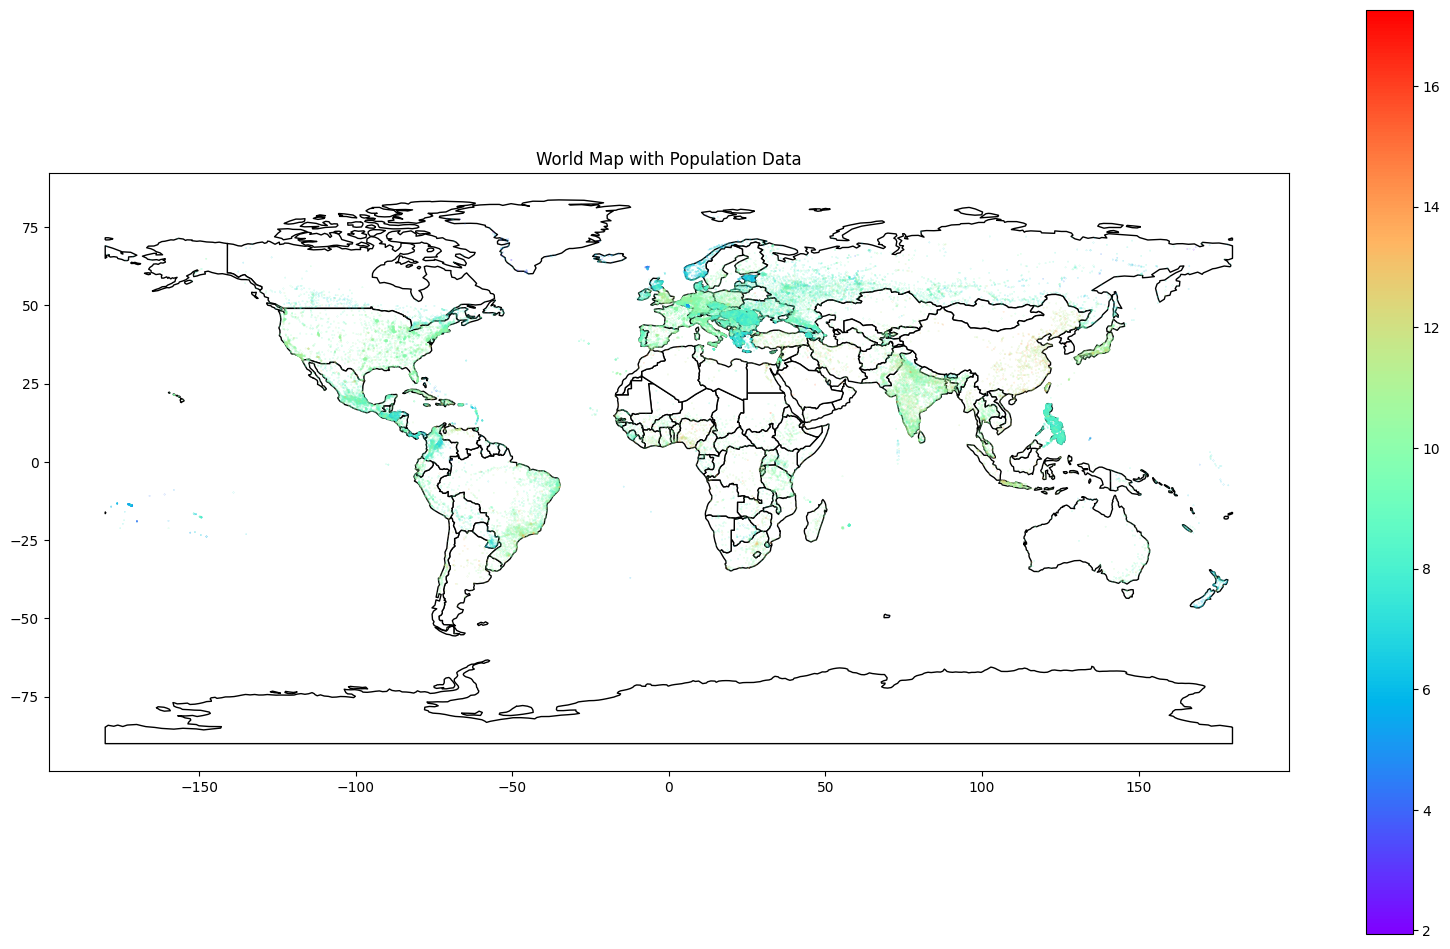

In [20]:
import numpy as np
import geopandas
from matplotlib import pyplot as plt
%matplotlib inline 

cities_Log = cities.dropna()

cities_Log.Population = np.log(cities_Log.Population)

gdf = geopandas.GeoDataFrame(
    cities_Log, geometry=geopandas.points_from_xy(cities_Log.Longitude, cities_Log.Latitude)
)

# create basemap instance
world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))

# plot GeoDataFrame on basemap
ax = world.plot(color="white", edgecolor="black", figsize=(20, 12))
gdf.plot(ax=ax, column="Population", cmap="rainbow", markersize=0.01, legend=True)

# add title and colorbar
ax.set_title("World Map with Population Data")

# show plot
plt.show()

> met de wereld map hierboven geef ik wat duidelijker aan waar elke not is. <p>
> dit doe ik met geopandas een extentie van pandas waar je een map gebruikt in aan plotter.

## Assignment 1b

Now we want to plot the cities in The Netherlands only. Use a scatter plot again to plot the cities, but now vary the size of the marker and the color with the population of that city.

Use a colorbar to show how the color of the marker relates to its population.

Use sensible limits to your axes so that you show only mainland The Netherlands (and not the Dutch Antilles).

C:\Users\super\AppData\Local\Temp\ipykernel_27712\3364231556.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))


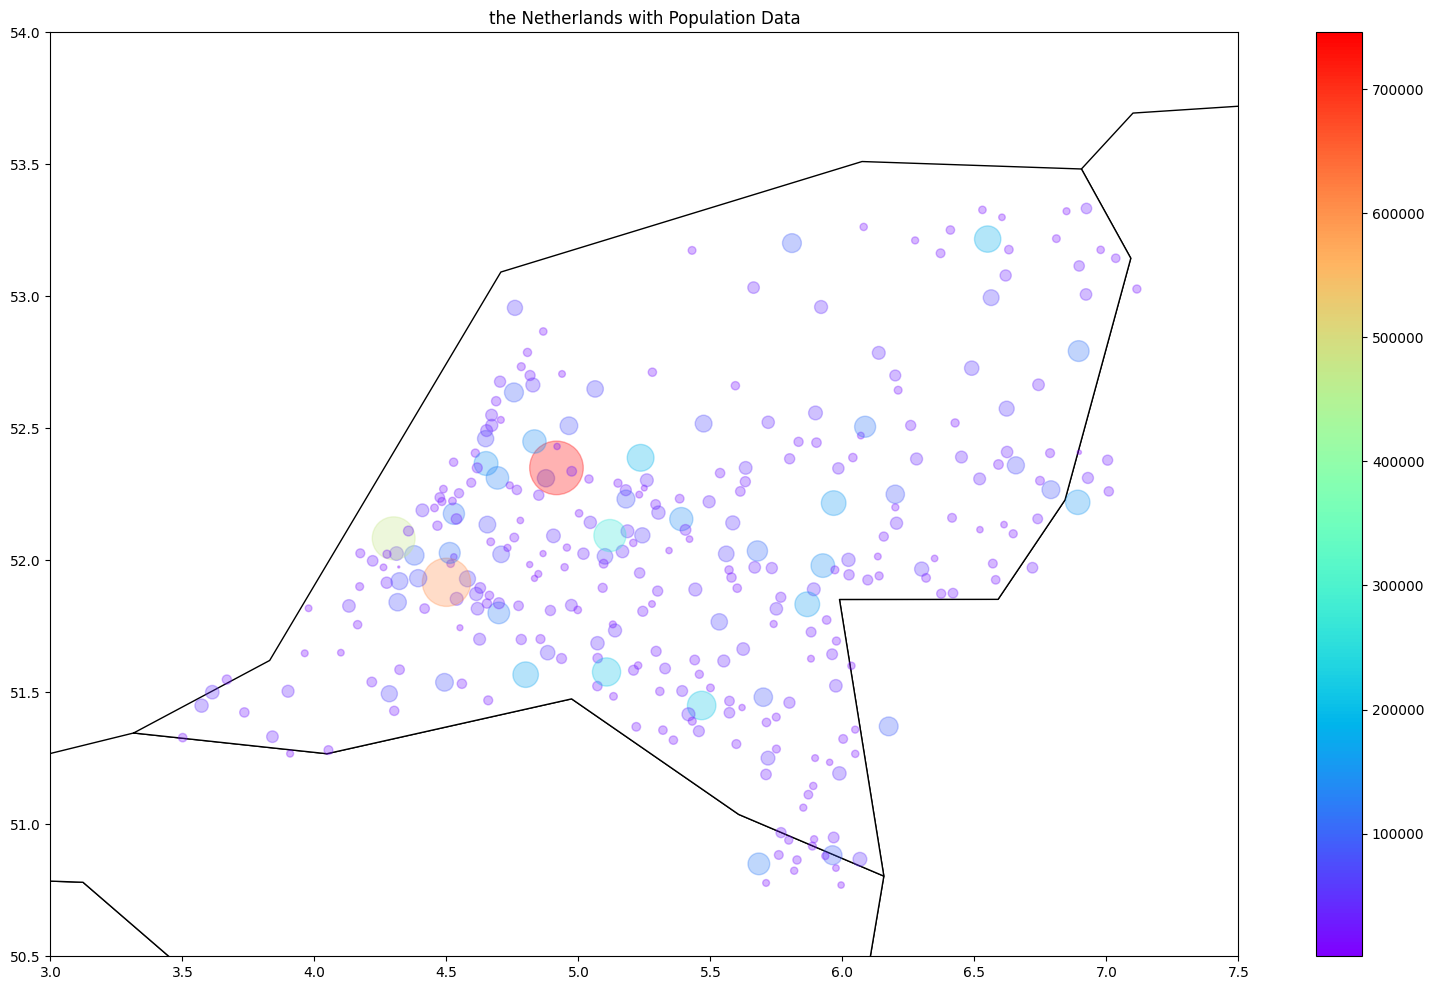

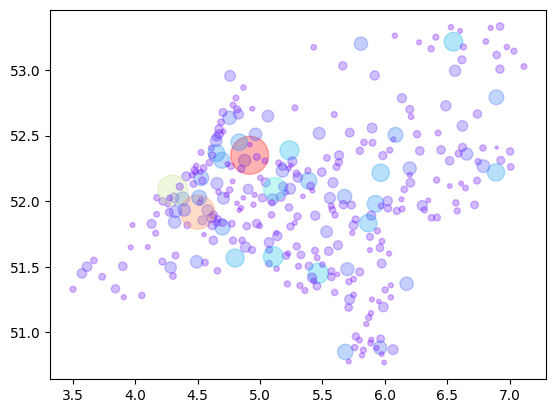

In [21]:
# get the cities in the netherlands and drop all with null or similar
dutch_cities = cities[cities['Country'] =='nl' ].dropna()

# create a gio map for the netherlands
dutch_gdf = geopandas.GeoDataFrame(
    dutch_cities, geometry=geopandas.points_from_xy(dutch_cities.Longitude, dutch_cities.Latitude)
)

# create basemap instance
world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))

# plot GeoDataFrame on basemap
dutch_ax = world.plot(color="white", edgecolor="black", figsize=(20, 12))
dutch_gdf.plot(ax=dutch_ax, column="Population", cmap="rainbow", legend=True, alpha=0.3, s=(dutch_cities['Population']/500))
# add title and colorbar
dutch_ax.set_title("the Netherlands with Population Data")

# zoom into the netherlands because I use basic geomap map
plt.xlim(3.0, 7.5)
plt.ylim(50.5, 54.0)

# show plot
plt.show()

# basic scatterplot
plt.scatter(alpha=0.3, s=(dutch_cities['Population']/1000), data=dutch_cities, x='Longitude', y='Latitude', cmap="rainbow", c=dutch_cities['Population'])

# show plot
plt.show()



> hierboven gebruik ik geopandas opnieuw om aan te geven wat de populatie is van steden binnen nederland allen <p>hieronder laat ik ook nog een lijst van nederlandse woongebieden. <p>sammen met een boxplot om te zien hoe groot de populatie is in een regio, het laat ook zien of er wat uitschieters zijn

Country         City   AccentCity Region  Population   Latitude  \
2029876      nl    landsmeer    Landsmeer     07     10338.0  52.431132   
2030494      nl       mierlo       Mierlo     06     10309.0  51.442222   
2028266      nl       haelen       Haelen     05     10283.0  51.234708   
2033463      nl        vlist        Vlist     11      9874.0  51.983806   
2030066      nl     liesveld     Liesveld     11      9842.0  51.931352   
2031456      nl    oudewater    Oudewater     09      9755.0  52.025333   
2032728      nl      strijen      Strijen     11      9190.0  51.744569   
2026127      nl     blaricum     Blaricum     07      8997.0  52.273551   
2031307      nl    ootmarsum    Ootmarsum     15      4748.0  52.409049   
2032221      nl  schipluiden  Schipluiden     11      1112.0  51.974596   

         Longitude  
2029876   4.918940  
2030494   5.619696  
2028266   5.951461  
2033463   4.815229  
2030066   4.833465  
2031456   4.865822  
2032728   4.551040  
2026127   5.249290  
2031307   6.897143  
2032221   4.319217

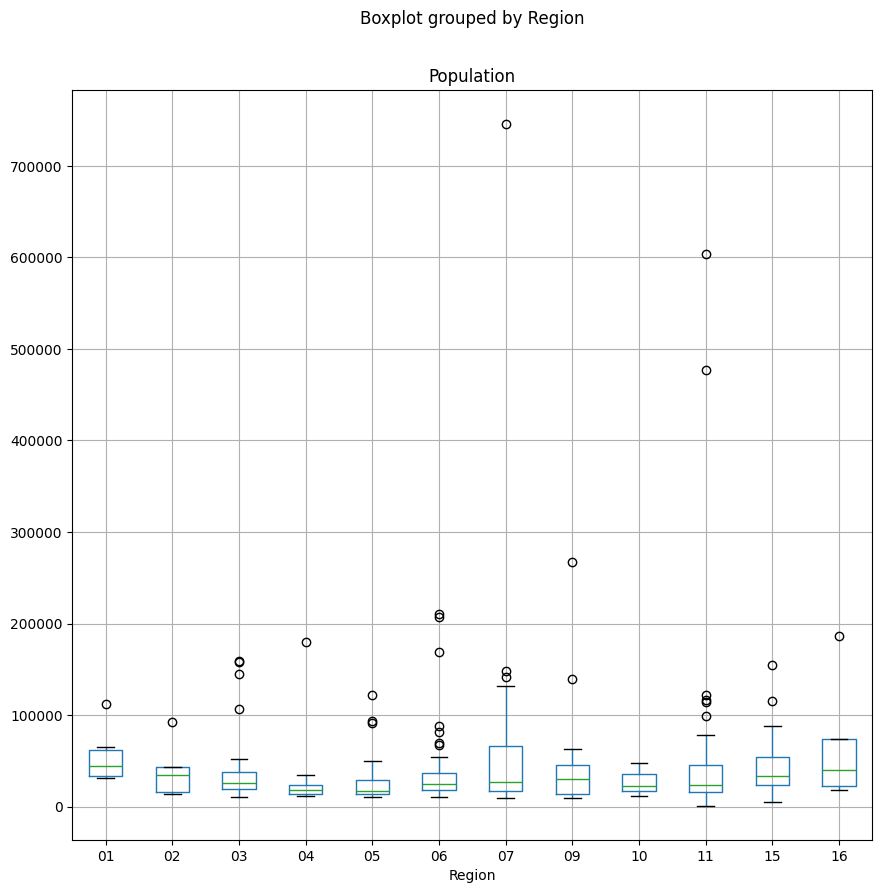

In [22]:
# Stuff i used to debug the data i had
dutch_cities.boxplot(column='Population', by='Region', figsize=(10,10));

dutch_cities.sort_values(by='Population', ascending=False).tail(10)

## Assignment 1c

Using assignment B, we could clearly see larger cities such as Amsterdam, Rotterdam and even Eindhoven. But we still do not really have a clear overview of how many big cities there are. To show a distribution we use a histogram plot.

What happens if we do not call the .dropna() function? it doesn't drop the null function.

Add proper basic plot elements to this plot and try to annotate which data point is Amsterdam and Eindhoven.

C:\Users\super\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\text.py:1461: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
C:\Users\super\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\text.py:894: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
C:\Users\super\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\text.py:753: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  p

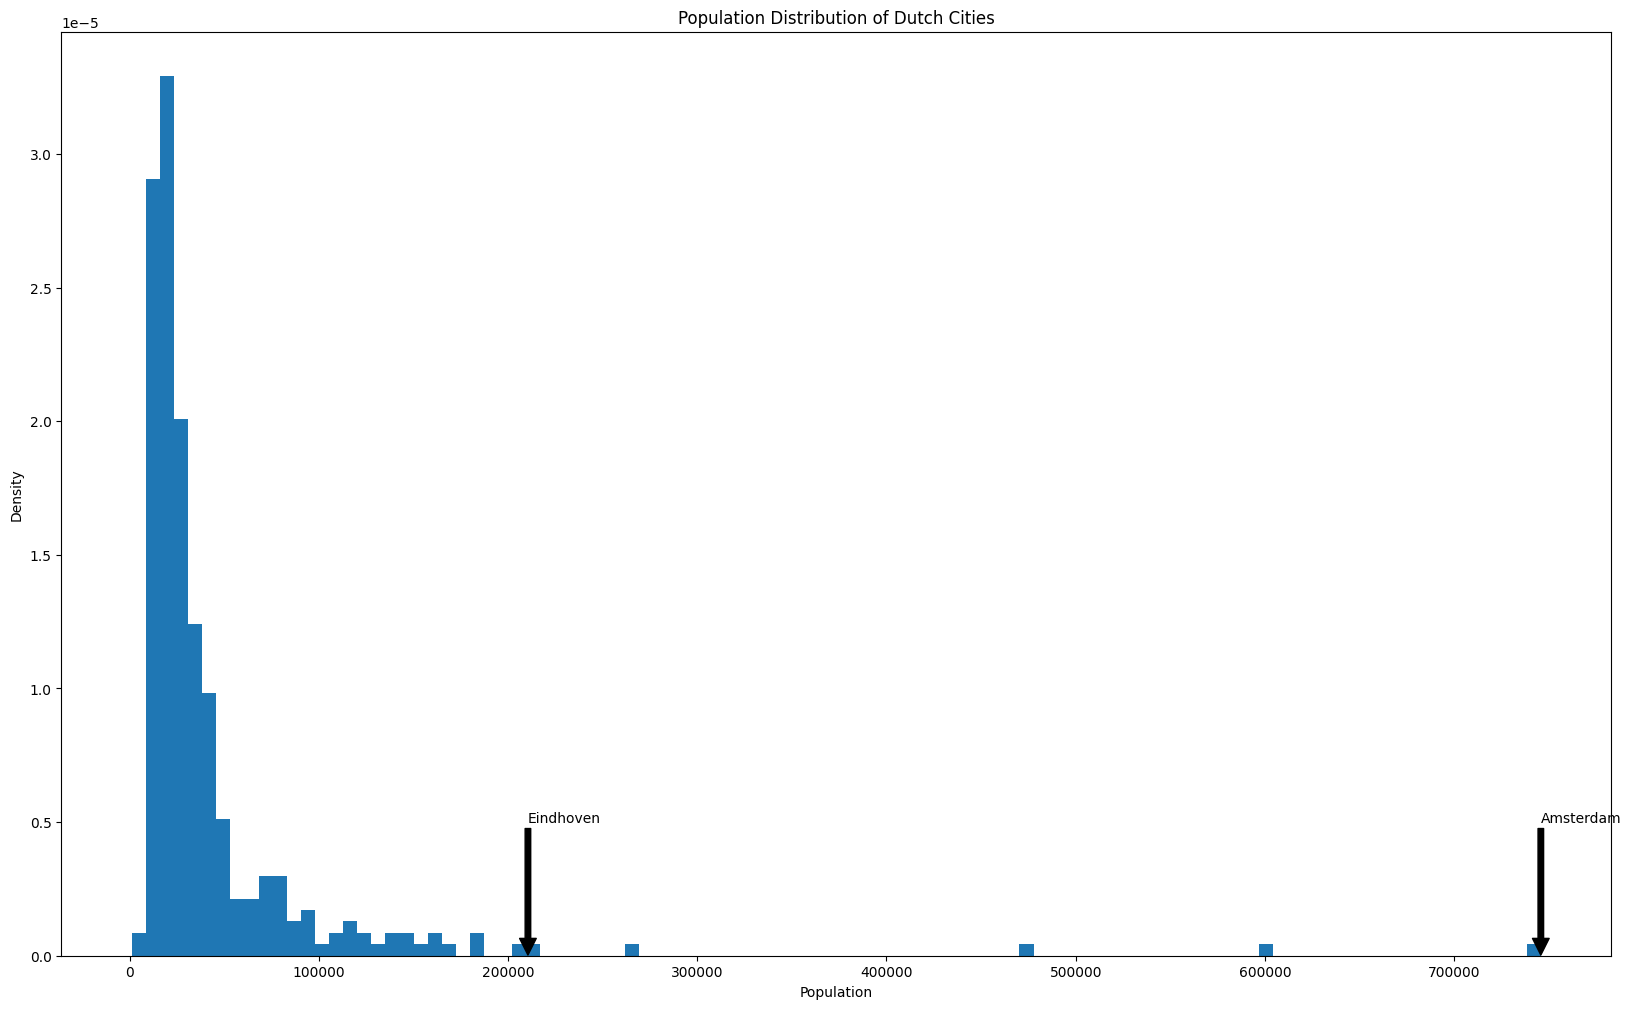

In [23]:
# set the basic valeus for the histogram.
plt.figure(figsize=(20,12));
plt.hist(dutch_cities.Population, 100, density=True );
# check if you understand the effect of the parameters...

## Your code and explanation in comments...

# Add title and labels
plt.title('Population Distribution of Dutch Cities')
plt.xlabel('Population')
plt.ylabel('Density')


# Annotate Amsterdam and Eindhoven
amsterdam_population = dutch_cities[dutch_cities['City'] == 'amsterdam']['Population']
eindhoven_population = dutch_cities[dutch_cities['City'] == 'eindhoven']['Population']

# put annotate in hist
plt.annotate('Amsterdam', xy=(amsterdam_population, 0), xytext=(amsterdam_population, 0.000005),
             arrowprops=dict(facecolor='black', shrink=0.005))
plt.annotate('Eindhoven', xy=(eindhoven_population, 0), xytext=(eindhoven_population, 0.000005),
             arrowprops=dict(facecolor='black', shrink=0.005))

# Show the plot
plt.show()

>hier do ik exact wat de opdracht vraagt van me en dat heb ik gedaan door op internet op te zoeken hoe je so iets doet.

## Assignment 1d

Now we want to compare how the distribution of Dutch cities compares to that of the entire world.

Use subplots to show the dutch distribution (top plot) and the world distribution (bottom plot).

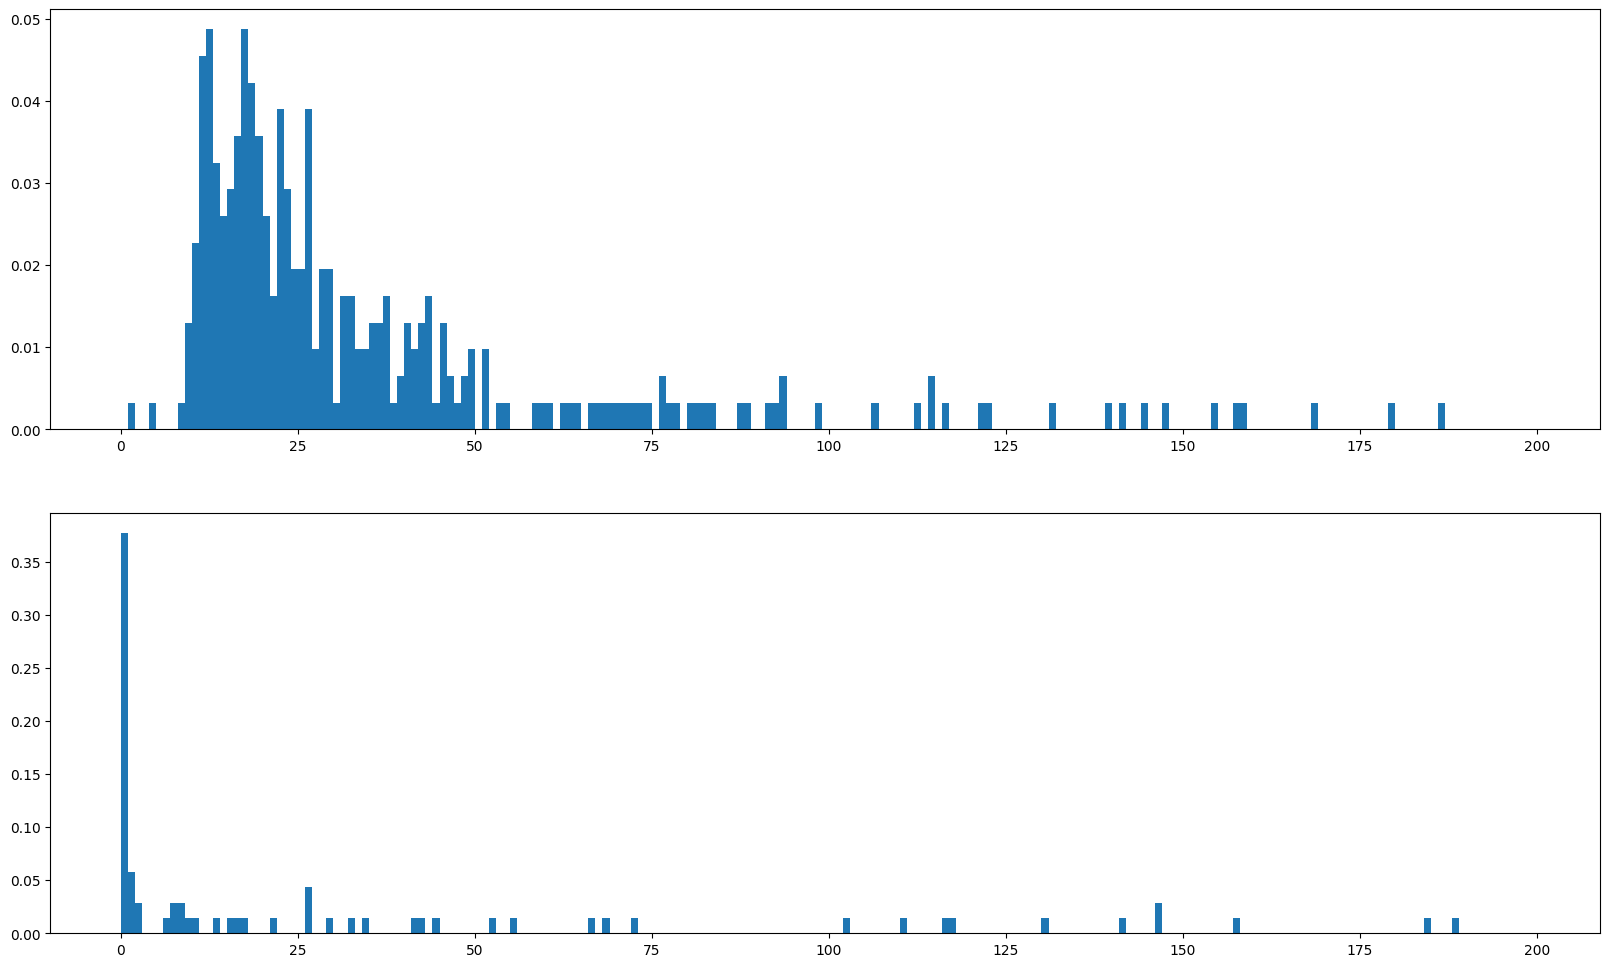

2025622    745811.0
Name: Population, dtype: float64

In [24]:
plt.figure(figsize=[20, 12]);
plt.subplot(2,1,1);
plt.hist(np.asarray(dutch_cities.Population/1000), bins=np.arange(0, 200, 1), density=True);

# Create the second subplot for the world cities
plt.subplot(2,1,2);

# Group the data by country and calculate the sum of the population
grouped = np.asarray(cities.groupby('Country')['Population'].sum()/1000)
plt.hist(grouped, bins=np.arange(0, 200, 1), density=1);


# Show the plot
plt.show()
amsterdam_population

## Assignment 1e

Write what conclusions you can deduce from the above plots?

> there are a lot of small population countries on the world that make it the bottom graf look smaller than is needed and a couple very big citties.<p>
it also proves that there are less large city's then there are are small villages

*week 2 exercise - part 2*

# Data visualization: Two additional Chart Types for Exploring

This assignment first shows two useful chart types: parallel coordinates and scatter matrix. You will practice these plots using a new dataset.

## Parallel Coordinates with Pandas

First, we import the required libraries, using standard conventions. For the example of parallel coordinates we shall use the famous iris data set, describing the sepal and petal dimensions for three types of irises.

In [25]:
import pandas as pd
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', sep=',', low_memory=False, encoding = 'ISO-8859-1', header=None)
iris.columns = ['sepal width','sepal length','petal width','petal length', 'name']

iris.head(10)

sepal width  sepal length  petal width  petal length         name
0          5.1           3.5          1.4           0.2  Iris-setosa
1          4.9           3.0          1.4           0.2  Iris-setosa
2          4.7           3.2          1.3           0.2  Iris-setosa
3          4.6           3.1          1.5           0.2  Iris-setosa
4          5.0           3.6          1.4           0.2  Iris-setosa
5          5.4           3.9          1.7           0.4  Iris-setosa
6          4.6           3.4          1.4           0.3  Iris-setosa
7          5.0           3.4          1.5           0.2  Iris-setosa
8          4.4           2.9          1.4           0.2  Iris-setosa
9          4.9           3.1          1.5           0.1  Iris-setosa

Now we do not use matplotlib directly but use a plot function of the pandas library that uses matplotlib in the background. In this case we create a parallel coordinates plot.

Pandas has many plotting function as can be seen here: http://pandas.pydata.org/pandas-docs/stable/visualization.html#parallel-coordinates

The parallel coordinates plot can give insight into a dataset with a large number of features. For the iris set there are four features (petal width, petal length, sepal width, sepal length).

While you can make a scatter plot with 4 features using x,y,color and size; a parallel coordinates plot is usually easier to understand once you know how to read it. Here would be the scatter plot:

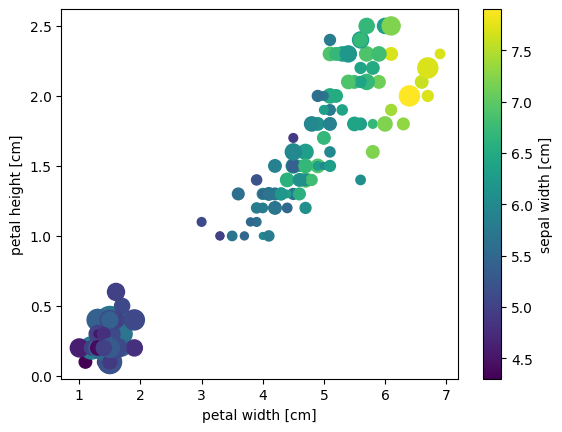

In [26]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

fig = plt.figure()
plt.scatter(iris['petal width'], iris['petal length'], c=iris['sepal width'], s=iris['sepal length']**4)
plt.xlabel('petal width [cm]')
plt.ylabel('petal height [cm]')
plt.colorbar(label='sepal width [cm]');

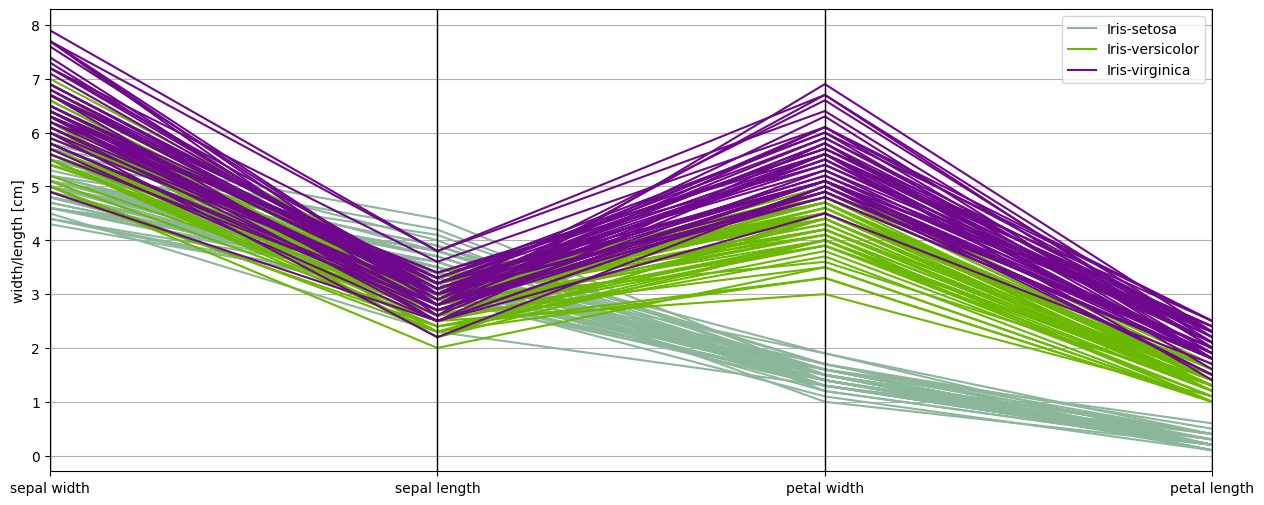

In [27]:
import numpy as np
from matplotlib import pyplot as plt
from pandas.plotting import parallel_coordinates
%matplotlib inline 

fig = plt.figure(figsize=[15,6])
ax = parallel_coordinates(iris,'name')
ax.set_ylabel('width/length [cm]');

## Scatter Matrix with Pandas

A scatter matrix is a chart that gives you an overview of the correlations between any number of feaures.

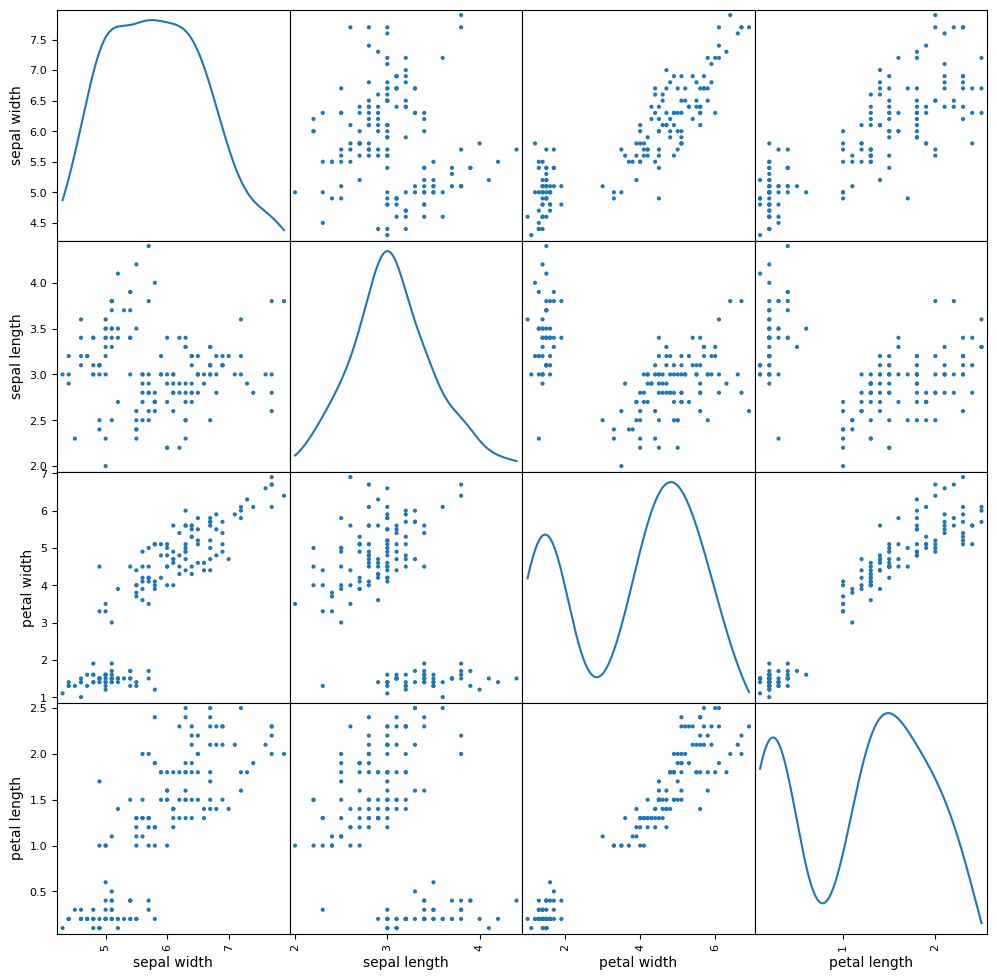

In [28]:
from pandas.plotting import scatter_matrix
scatter_matrix(iris, alpha=1, figsize=(12, 12), diagonal='kde');

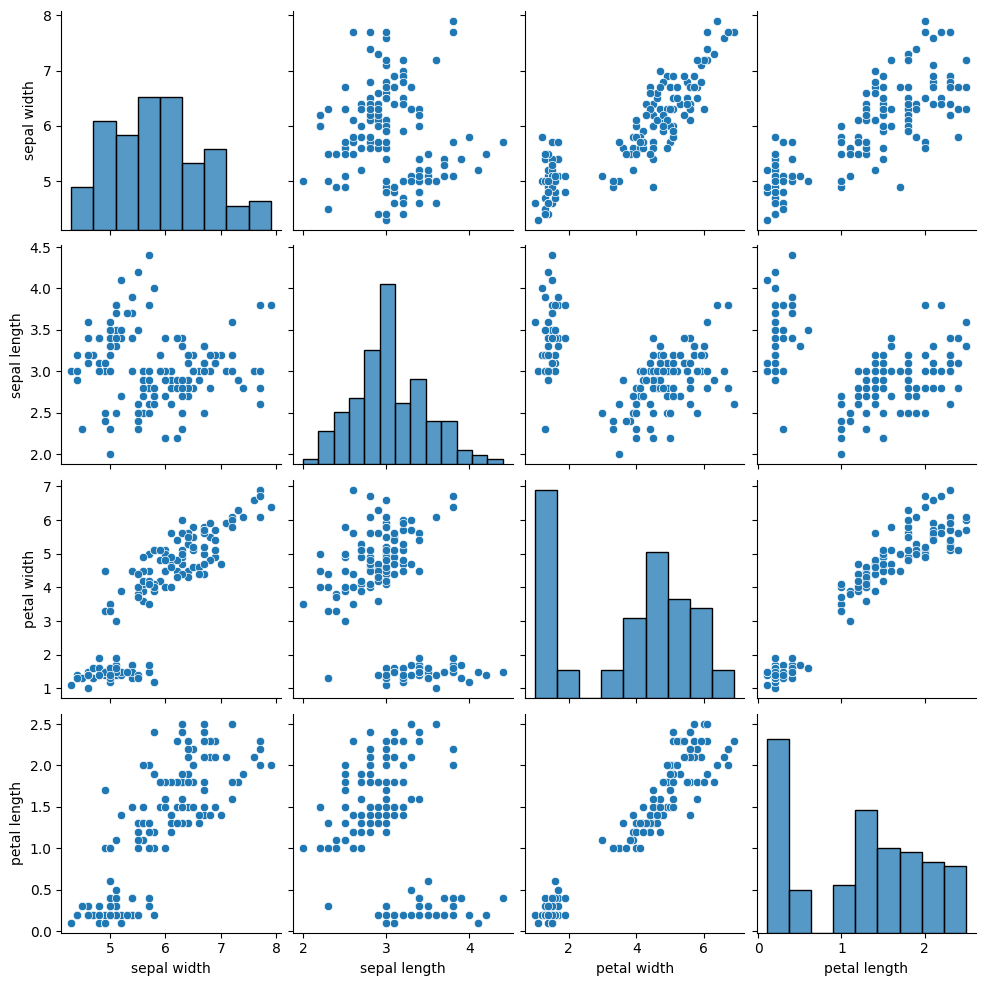

In [29]:
# or see what happens if we use the Seaborn library...
import seaborn as sns
sns.pairplot(iris)

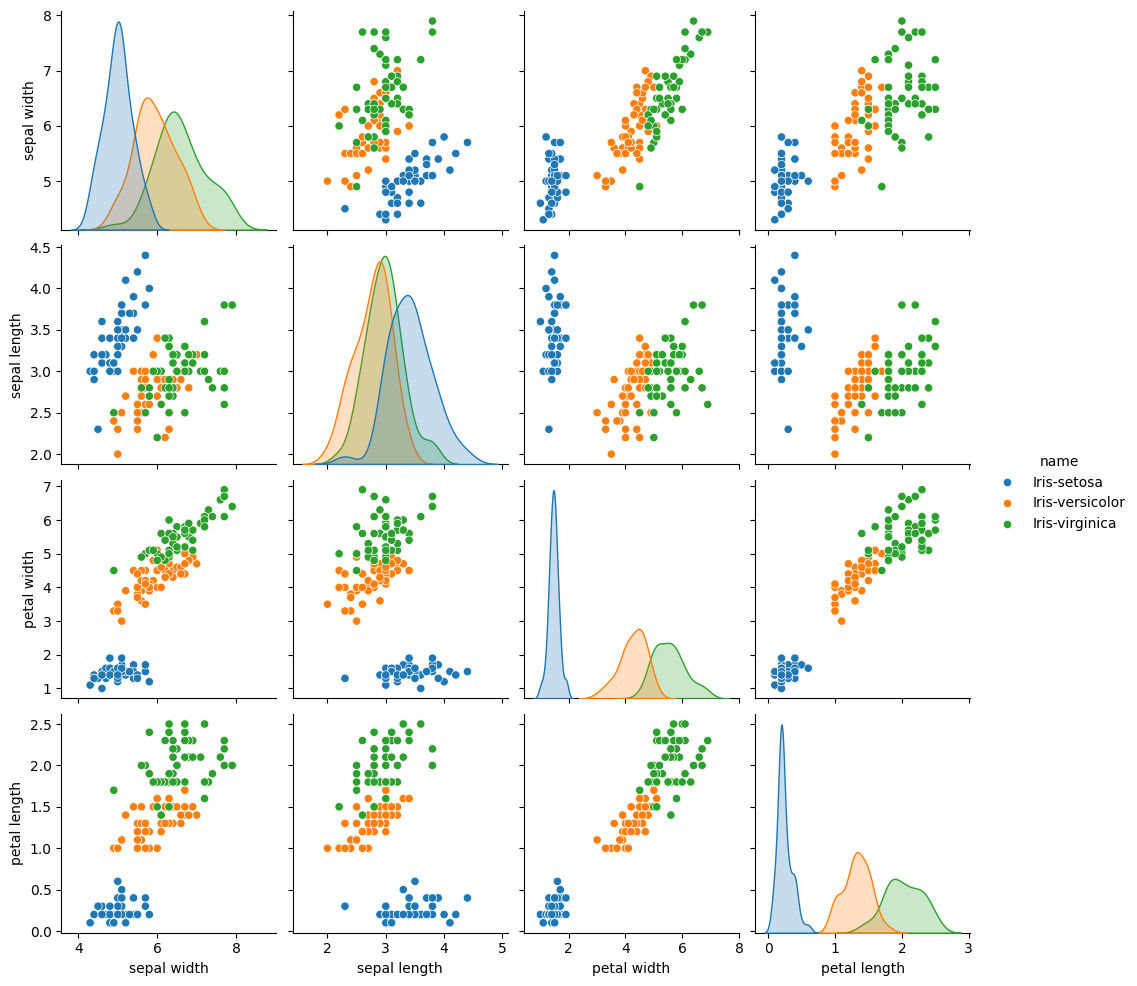

In [30]:
# Seaborn provides some simples ways to explore the data and correlations in more (visual) detail...
import seaborn as sns
sns.pairplot(iris, hue="name")

## Assignment
Now try to create similar plots for a new dataset about car features.

In [35]:
# The data file is quite nasty with several different delimeters that read_csv cannot handle very well
names=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name','j','k','l','m','n']
cars = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', delimiter=r"\s+", names=names, header=None, engine='python')
# Create a subset of dataset with all useful features
cars = cars.iloc[:,[0,1,2,4,5,6,7]]
display(cars)

mpg  cylinders  displacement  weight  acceleration  model year  origin
0    18.0          8         307.0  3504.0          12.0          70       1
1    15.0          8         350.0  3693.0          11.5          70       1
2    18.0          8         318.0  3436.0          11.0          70       1
3    16.0          8         304.0  3433.0          12.0          70       1
4    17.0          8         302.0  3449.0          10.5          70       1
..    ...        ...           ...     ...           ...         ...     ...
393  27.0          4         140.0  2790.0          15.6          82       1
394  44.0          4          97.0  2130.0          24.6          82       2
395  32.0          4         135.0  2295.0          11.6          82       1
396  28.0          4         120.0  2625.0          18.6          82       1
397  31.0          4         119.0  2720.0          19.4          82       1

[398 rows x 7 columns]

> hierboven laat ik de gegevens in van de auto's, ik gebruik `delimiter=r"\s+"` om de data goed te splitsen en te zetten in de goede collom. 

# Create a normalized dataset
using Mean normalization (see: https://en.wikipedia.org/wiki/Feature_scaling#Mean_normalization)

In [36]:
# copy the data for mean normal
cars_mean_norm = cars.copy() 

# apply normalization techniques 
for column in cars_mean_norm.columns: 
	cars_mean_norm[column] = (cars_mean_norm[column] -
						cars_mean_norm[column].mean()) / cars_mean_norm[column].std()	 

display(cars_mean_norm);

mpg  cylinders  displacement    weight  acceleration  model year  \
0   -0.705551   1.496308      1.089233  0.630077     -1.293870   -1.625381   
1   -1.089379   1.496308      1.501624  0.853259     -1.475181   -1.625381   
2   -0.705551   1.496308      1.194728  0.549778     -1.656492   -1.625381   
3   -0.961437   1.496308      1.060461  0.546236     -1.293870   -1.625381   
4   -0.833494   1.496308      1.041280  0.565130     -1.837804   -1.625381   
..        ...        ...           ...       ...           ...         ...   
393  0.445936  -0.855244     -0.512381 -0.213056      0.011571    1.619944   
394  2.620966  -0.855244     -0.924773 -0.992422      3.275173    1.619944   
395  1.085650  -0.855244     -0.560333 -0.797581     -1.438919    1.619944   
396  0.573879  -0.855244     -0.704191 -0.407897      1.099439    1.619944   
397  0.957708  -0.855244     -0.713781 -0.295716      1.389537    1.619944   

       origin  
0   -0.714246  
1   -0.714246  
2   -0.714246  
3   -0.714246  
4   -0.714246  
..        ...  
393 -0.714246  
394  0.532552  
395 -0.714246  
396 -0.714246  
397 -0.714246  

[398 rows x 7 columns]

> hierboven laad ik de auto's in een mean normal zoals gevraagt was. <p> hieronder heb ik er voor gekozen om ook een min-max normal te maken om later te zien of er een groot verschil zit.

In [37]:
# copy the data for MinMax mormal
cars_norm = cars.copy() 
  
# apply normalization techniques 
for column in cars_norm.columns: 
    cars_norm[column] = (cars_norm[column] - cars_norm[column].min()) / (cars_norm[column].max() - cars_norm[column].min())
      
# view normalized data 
display(cars_norm);

mpg  cylinders  displacement    weight  acceleration  model year  \
0    0.239362        1.0      0.617571  0.536150      0.238095         0.0   
1    0.159574        1.0      0.728682  0.589736      0.208333         0.0   
2    0.239362        1.0      0.645995  0.516870      0.178571         0.0   
3    0.186170        1.0      0.609819  0.516019      0.238095         0.0   
4    0.212766        1.0      0.604651  0.520556      0.148810         0.0   
..        ...        ...           ...       ...           ...         ...   
393  0.478723        0.2      0.186047  0.333711      0.452381         1.0   
394  0.930851        0.2      0.074935  0.146583      0.988095         1.0   
395  0.611702        0.2      0.173127  0.193365      0.214286         1.0   
396  0.505319        0.2      0.134367  0.286929      0.630952         1.0   
397  0.585106        0.2      0.131783  0.313864      0.678571         1.0   

     origin  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
..      ...  
393     0.0  
394     0.5  
395     0.0  
396     0.0  
397     0.0  

[398 rows x 7 columns]

Next, create a parallel coordinates plot. What happens when you do not use the normalized data?

mpg  cylinders  displacement  weight  acceleration  model year  origin
0  18.0          8         307.0  3504.0          12.0          70       1
1  15.0          8         350.0  3693.0          11.5          70       1
2  18.0          8         318.0  3436.0          11.0          70       1
3  16.0          8         304.0  3433.0          12.0          70       1
4  17.0          8         302.0  3449.0          10.5          70       1
5  15.0          8         429.0  4341.0          10.0          70       1
6  14.0          8         454.0  4354.0           9.0          70       1
7  14.0          8         440.0  4312.0           8.5          70       1
8  14.0          8         455.0  4425.0          10.0          70       1
9  15.0          8         390.0  3850.0           8.5          70       1

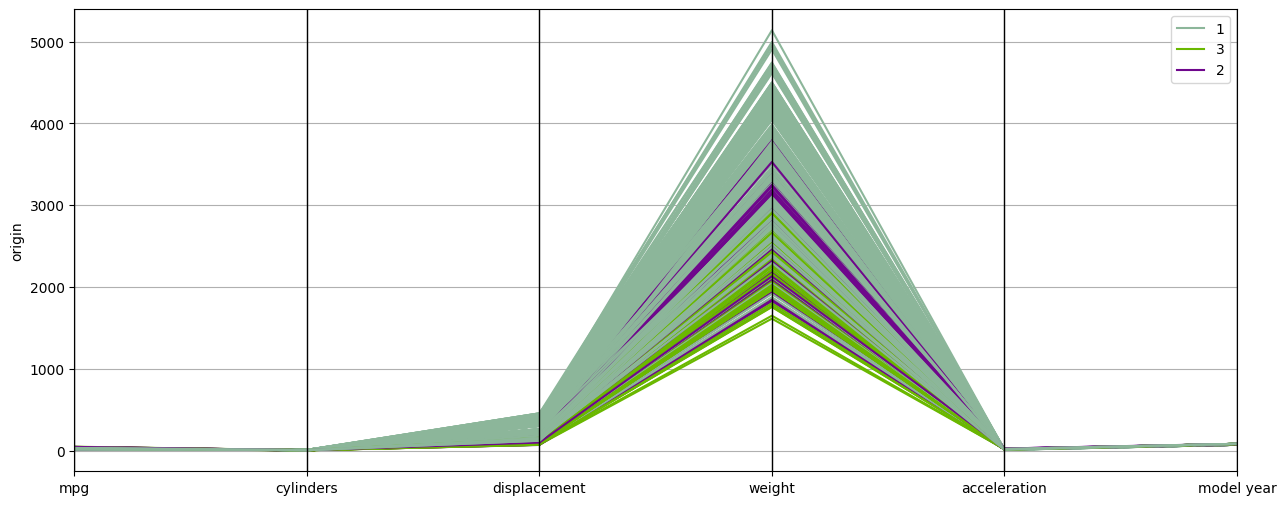

In [42]:
main_row = 'origin'
display(cars.head(10))

# no normalize
fig = plt.figure(figsize=[15,6])
ax = parallel_coordinates(cars, main_row)
ax.set_ylabel(main_row);

> hierboven kijk ik eers hoe het er uit ziet als er geen normaal gebruikt word. simple niet veel dat hier gebeurt behalve dat `weight` uit de pan schiet.

C:\Users\super\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


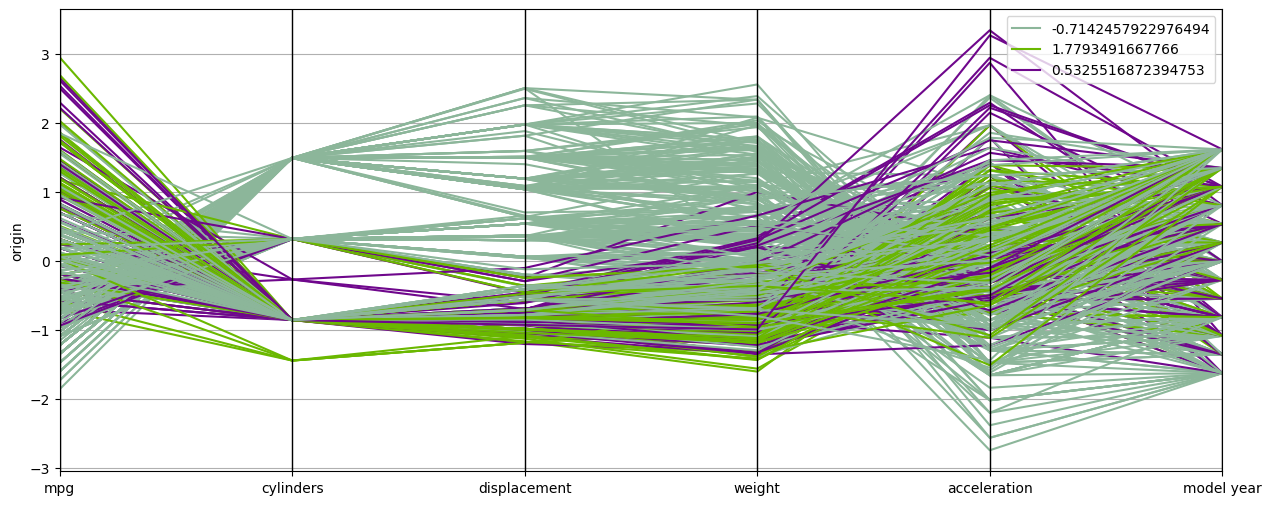

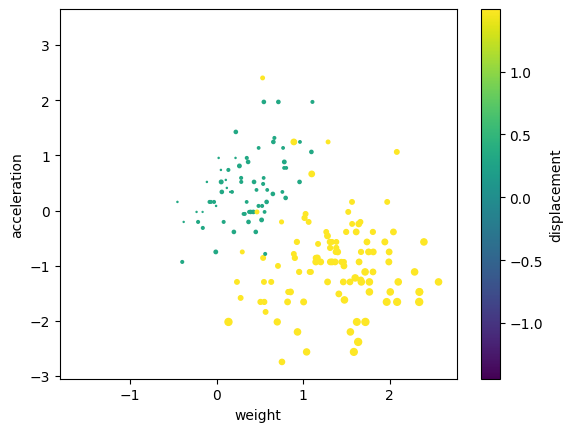

In [43]:
# mean normalize
fig = plt.figure(figsize=[15,6])
ax = parallel_coordinates(cars_mean_norm, main_row)
ax.set_ylabel(main_row);

fig = plt.figure()
plt.scatter(cars_mean_norm['weight'], cars_mean_norm['acceleration'], c=cars_mean_norm['cylinders'], s=(cars_mean_norm['displacement']*10))
plt.xlabel('weight')
plt.ylabel('acceleration')
plt.colorbar(label='displacement');

> hierboven gebruik ik Mean normal en dat laat al een heel wat leesbaarder diagram. het laat ook zien dat de `origin` een beetje van belang is

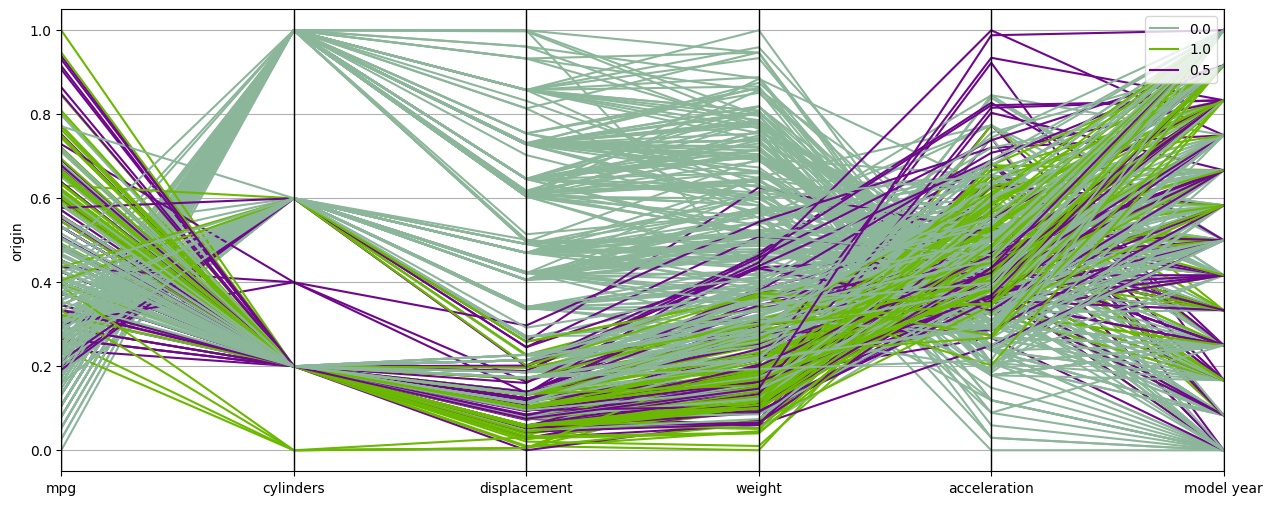

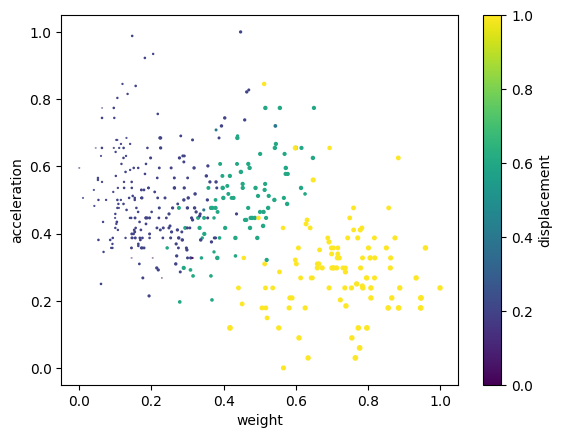

In [44]:
# normalize
fig = plt.figure(figsize=[15,6])
ax = parallel_coordinates(cars_norm, main_row)
ax.set_ylabel(main_row);

fig = plt.figure()
plt.scatter(cars_norm['weight'], cars_norm['acceleration'], c=cars_norm['cylinders'], s=(cars_norm['displacement']*10))
plt.xlabel('weight')
plt.ylabel('acceleration')
plt.colorbar(label='displacement');

> hierboven gebruik ik een Min-max normaal. het laat meer zien dat het better is voor een scatter plot maar de `parallel_coordinates` is meschien een beetje beter leesbaar maar niet veel meer dan de mean normal.

Answer this question: What conclusions can you make from the relation between weight and acceleration? If you don't understand how to interpret parallel coordinates plots, read: https://eagereyes.org/techniques/parallel-coordinates.


>the relation between weight and acceleration is a Low negative corralation, the heavier the car tha less acceleration. 


Next, try to highlight the model years >= 80. 

Hints: 
* you can slice your data with ```cars_norm[cars['model year']>=80]```.
* you can plot both all data and the sliced data on top of each other with different colors  

In [47]:
cars_eighty_norm = cars_norm[cars['model year']>=80]

display(cars_eighty_norm)

mpg  cylinders  displacement    weight  acceleration  model year  \
309  0.864362        0.2      0.077519  0.150553      0.398810    0.833333   
310  0.773936        0.2      0.054264  0.100652      0.642857    0.833333   
311  0.614362        0.2      0.077519  0.143748      0.446429    0.833333   
312  0.750000        0.2      0.046512  0.115112      0.500000    0.833333   
313  0.505319        0.2      0.214470  0.301956      0.505952    0.833333   
..        ...        ...           ...       ...           ...         ...   
393  0.478723        0.2      0.186047  0.333711      0.452381    1.000000   
394  0.930851        0.2      0.074935  0.146583      0.988095    1.000000   
395  0.611702        0.2      0.173127  0.193365      0.214286    1.000000   
396  0.505319        0.2      0.134367  0.286929      0.630952    1.000000   
397  0.585106        0.2      0.131783  0.313864      0.678571    1.000000   

     origin  
309     0.5  
310     1.0  
311     0.0  
312     1.0  
313     0.0  
..      ...  
393     0.0  
394     0.5  
395     0.0  
396     0.0  
397     0.0  

[89 rows x 7 columns]

> eerst haal ik de auto's die van of voor 1980 komen. <p>Hieronder zet ik het in een `parallel_coordinates` en kijk wat het verschil is tussen anderen. en een scatter plot.

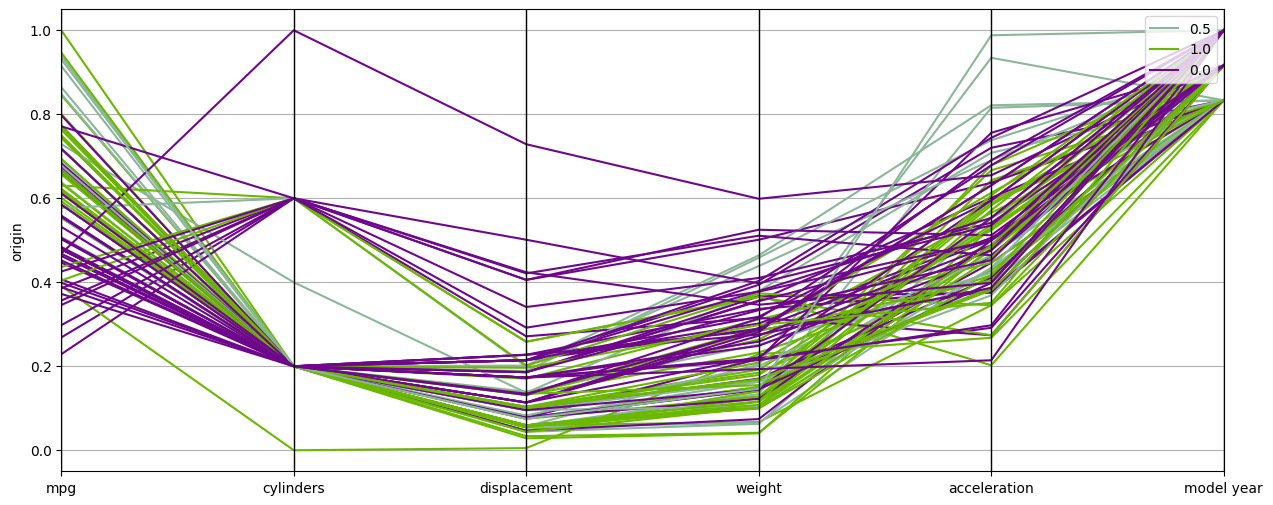

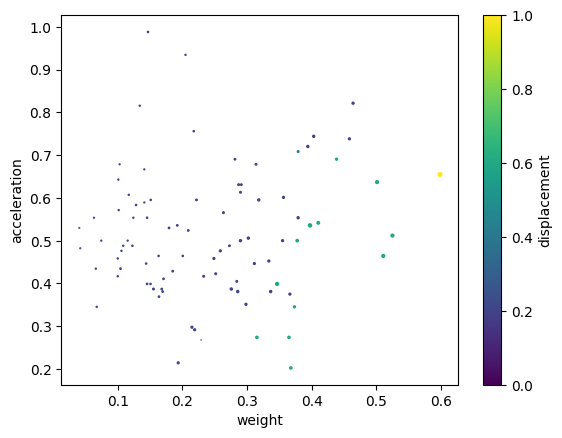

In [48]:
fig = plt.figure(figsize=[15,6])
ax = parallel_coordinates(cars_eighty_norm, main_row)
ax.set_ylabel(main_row);

fig = plt.figure()
plt.scatter(cars_eighty_norm['weight'], cars_eighty_norm['acceleration'], c=cars_eighty_norm['cylinders'], s=(cars_eighty_norm['displacement']*10))
plt.xlabel('weight')
plt.ylabel('acceleration')
plt.colorbar(label='displacement');

> terwijl de `scatter plot` er niet veel uit te hallen maar de parrelel plot is zekker meer leesbaar. all is het omdat er minder data in zit nu.

Answer this question: what conclusions can you draw from cars with model years 80-82?

> while in all the car data it seems that to have a low negative coralation, the years 80-82 have no coralalation. this indicate that in these years it seems the weight not always effected the acceleration.

Now, create a scatter matrix for the car data. 
Do we need to use the normalized data?
Are we looking for a dataset that we can easily cluster or will we get more luck looking for trends?

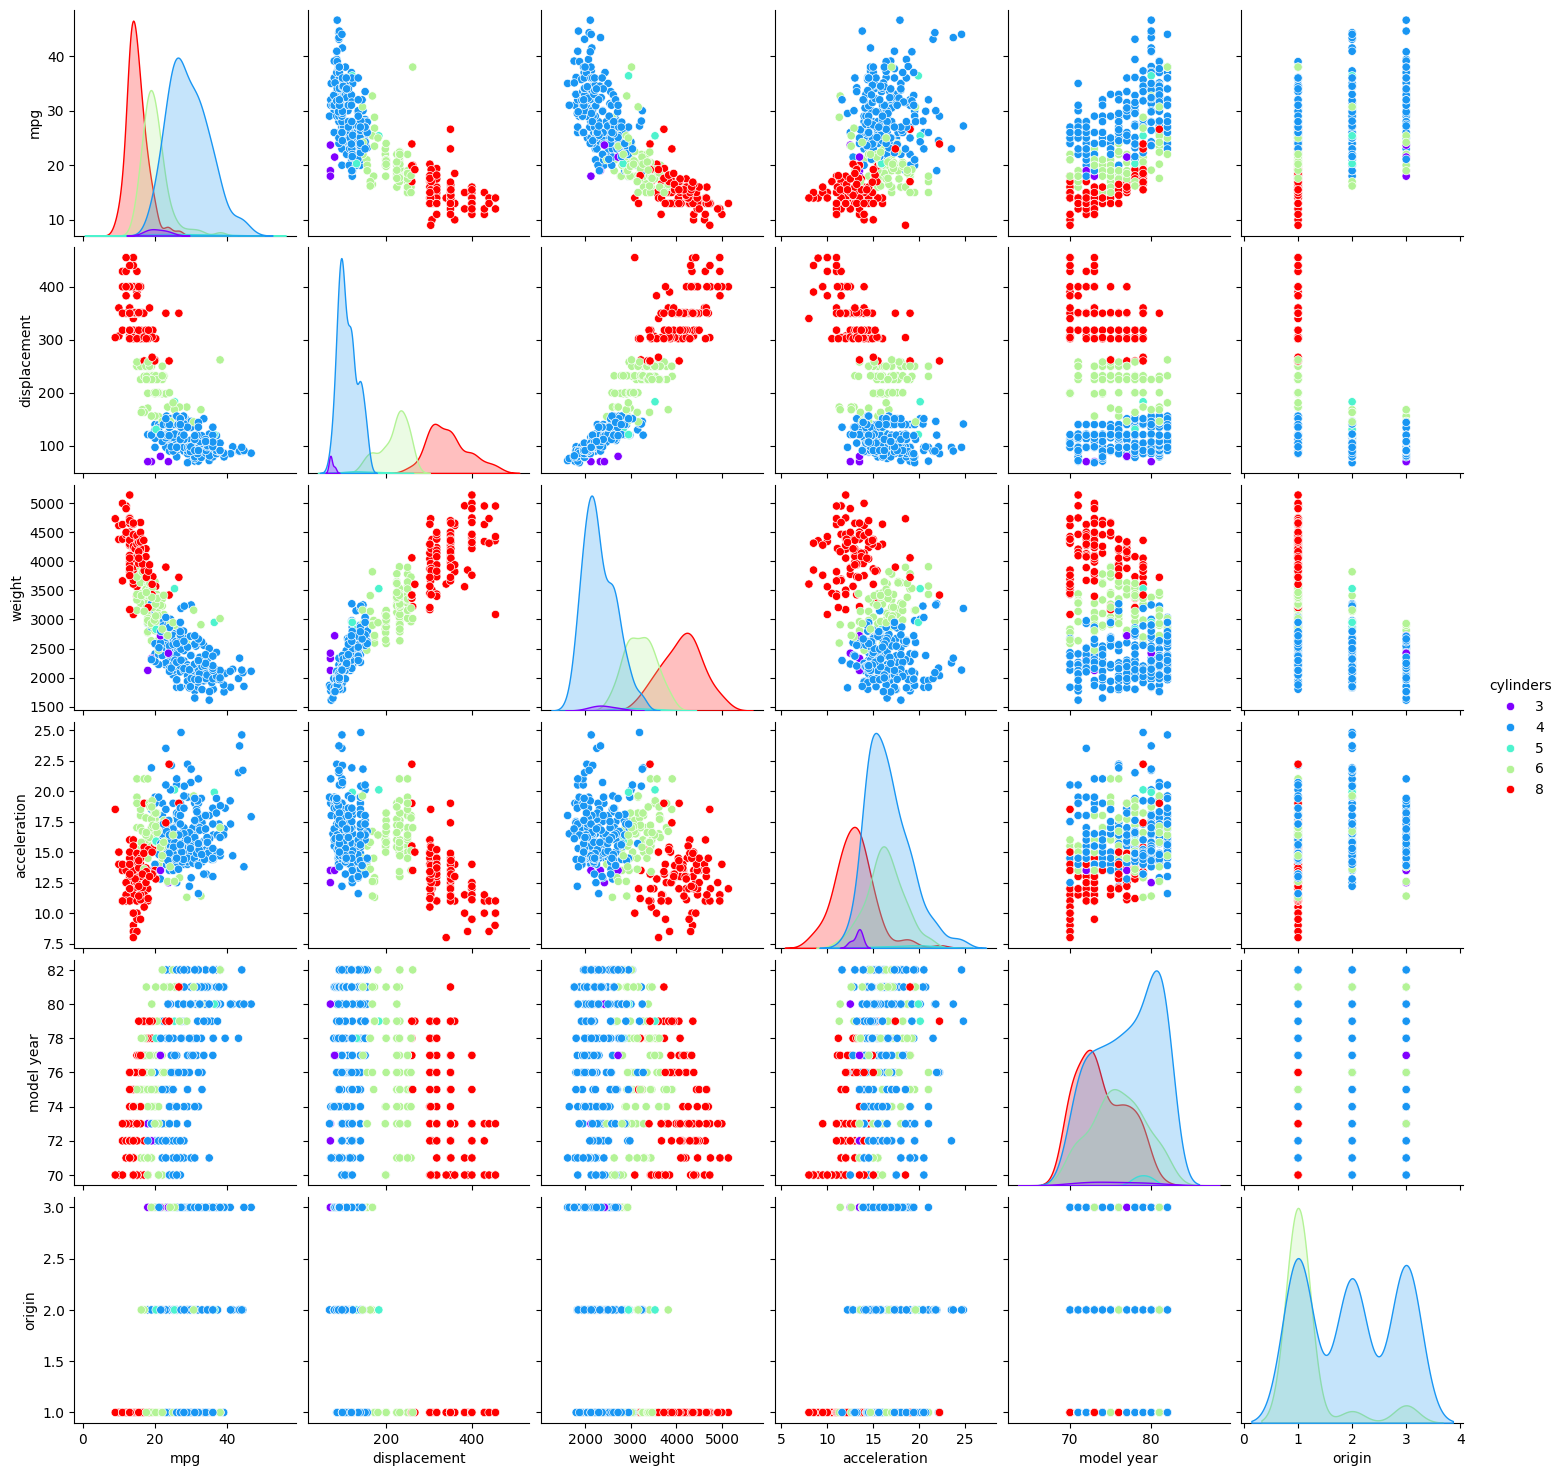

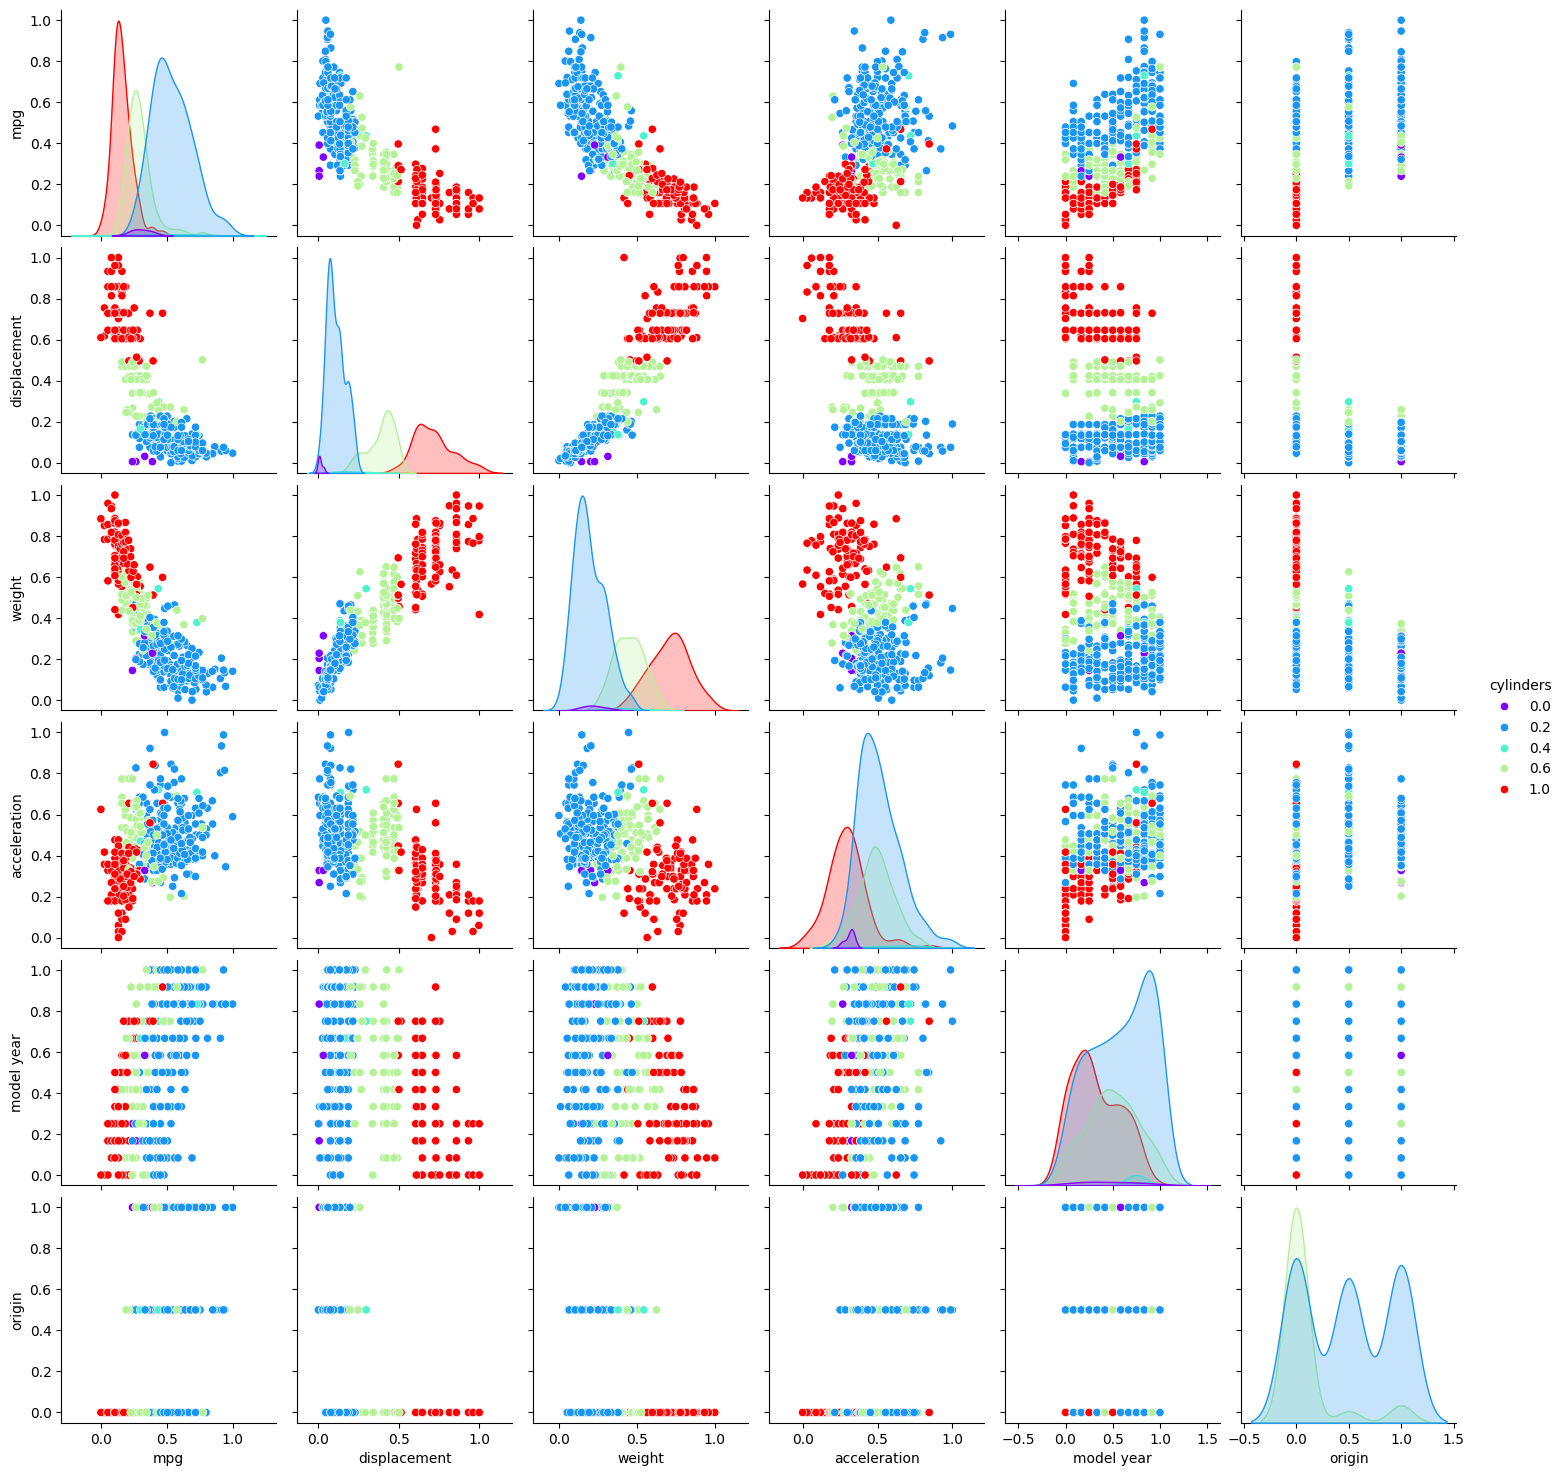

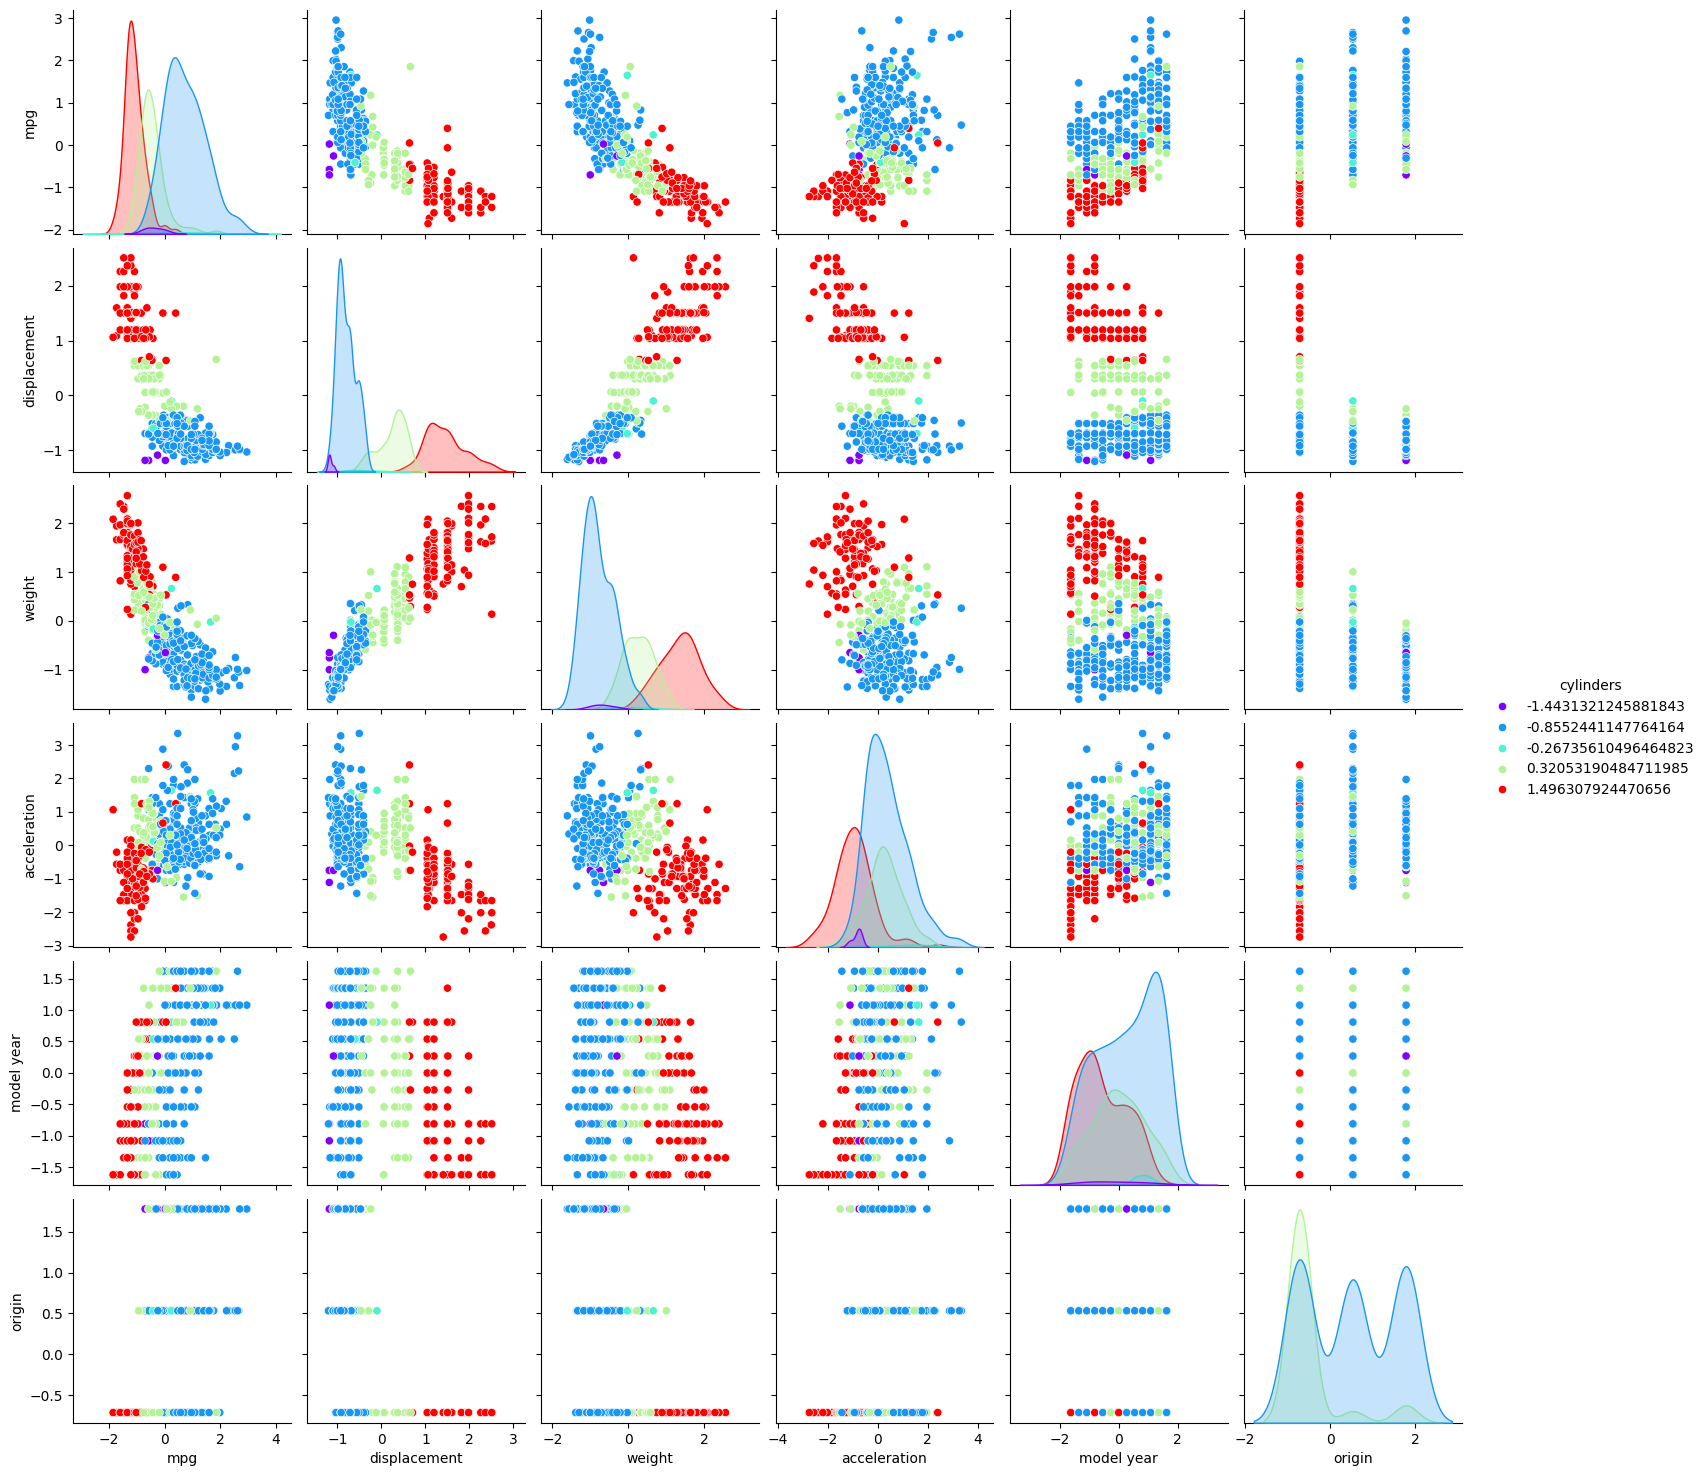

In [26]:
## Create the scatter matrix here
import seaborn as sns
sns.pairplot(cars, hue="cylinders", palette='rainbow');
sns.pairplot(cars_norm, hue="cylinders", palette='rainbow');
sns.pairplot(cars_mean_norm, hue="cylinders", palette='rainbow');

> uit de test hierboven is uit te hallen dat het niet veel uitmaakt of je een versie van normaal gebruikt of de original data. ze lijken allemaal hetzelfde.

*What are your final conclusions looking at the (visual) results? What did you learn about the data and dataset? Or what new questions did you derive from the plots you've made?*

>I lerned that there there were only a couple 3 and 5 cilinder cars, only one seems to make 8 cilinder cars, the more cilinders the heavier the car and higher displacement. <p>but the weight and displacement seems to slowly get less every year, while mpg seems to increes per year. <p>using mean norm or norm does not affect this data. it all looks the same. exept for the breaking of the mean origin/origin graph.